python 3.8일때, orange=3.25 설치 하여 사용 가능

총 23개 데이터셋(breast 포함) CD 값 : 1.1647
총 22개 데이터셋(breast 제외) CD 값 : 1.1908

In [9]:
!pip install orange3==3.25

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
     |████████████████████████████████| 2.6 MB 10.0 MB/s eta 0:00:01
  Attempting uninstall: orange3
    Found existing installation: Orange3 3.36.2
    Uninstalling Orange3-3.36.2:
      Successfully uninstalled Orange3-3.36.2


[2.2  2.64 3.72 1.44]
Critical Difference =  0.8921911230224161


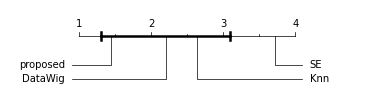

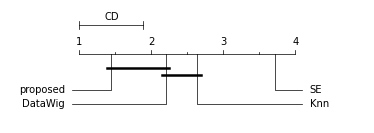

In [ ]:
# 본페로니 듄테스트
import numpy as np
import scipy.stats as st
import Orange
from Orange.evaluation import compute_CD
import matplotlib.pyplot as plt

# RMSE 데이터
DataWig = [0.5641, 0.3699, 0.2146, 0.2786, 0.2516, 0.8653, 0.3636, 0.261, 0.5095, 0.4574, 0.5403, 0.2783, 0.1475, 0.1748, 0.2621, 0.2543, 0.2884, 0.2698, 0.1641, 0.1724, 0.3368, 0.4654, 0.1613, 0.2222, 0.3853]
Knn = [0.7109, 0.4442, 0.2582, 0.2589, 0.0893, 1.1979, 0.3449, 0.3243, 0.5531, 0.4302, 0.7072, 0.3055, 0.1693, 0.1883, 0.3186, 0.2397, 0.3589, 0.2819, 0.1637, 0.2448, 0.3905, 0.4182, 0.1726, 0.3045, 0.403]
SE = [0.6371, 0.7026, 0.5803, 0.683, 0.692, 0.3895, 0.6285, 0.246, 0.6562, 0.7228, 0.6469, 0.4986, 0.6622, 0.7074, 0.3842, 0.6346, 0.6943, 0.4786, 0.6207, 0.3185, 0.7025, 0.9933, 1.2148, 1.2584, 0.5213]
proposed = [0.3535, 0.3476, 0.2103, 0.2775, 0.2054, 0.2863, 0.441, 0.2544, 0.1713, 0.4695, 0.3052, 0.2336, 0.1466, 0.1744, 0.2637, 0.2528, 0.2826, 0.26, 0.1719, 0.1723, 0.3032, 0.4088, 0.152, 0.2208, 0.3532]

# DataWig = [0.5641, 0.3699, 0.2146, 0.2786, 0.2516, 0.8653, 0.3636, 0.261, 0.5095, 0.4574, 0.5403, 0.2783, 0.1475, 0.1748, 0.2621, 0.2543, 0.2884, 0.2698, 0.1641, 0.1724, 0.3368, 0.4654]
# Knn = [0.7109, 0.4442, 0.2582, 0.2589, 0.0893, 1.1979, 0.3449, 0.3243, 0.5531, 0.4302, 0.7072, 0.3055, 0.1693, 0.1883, 0.3186, 0.2397, 0.3589, 0.2819, 0.1637, 0.2448, 0.3905, 0.4182]
# SE = [0.6371, 0.7026, 0.5803, 0.683, 0.692, 0.3895, 0.6285, 0.246, 0.6562, 0.7228, 0.6469, 0.4986, 0.6622, 0.7074, 0.3842, 0.6346, 0.6943, 0.4786, 0.6207, 0.3185, 0.7025, 0.9933]
# proposed = [0.3535, 0.3476, 0.2103, 0.2775, 0.2054, 0.2863, 0.441, 0.2544, 0.1713, 0.4695, 0.3052, 0.2336, 0.1466, 0.1744, 0.2637, 0.2528, 0.2826, 0.26, 0.1719, 0.1723, 0.3032, 0.4088]


# 데이터셋 개수
N = 25

# 각 method의 순위 계산 (수정된 부분)
# 이 부분은 accuracy 할 때 순위 계산되는 부분
# ranks = np.argsort(np.argsort(-np.vstack((DataWig, Knn, SE, proposed)), axis=0), axis=0) + 1
# 이 부분은 rmse 할 때 순위 계산되는 부분
ranks = np.argsort(np.argsort(np.vstack((DataWig, Knn, SE, proposed)), axis=0), axis=0) + 1


# 각 method의 평균 순위 계산
average_ranks = np.mean(ranks, axis=1)
print(average_ranks)
# method의 이름
names = ['DataWig', 'Knn', 'SE', 'proposed']

def compute(avranks):
    # CD
    cd = Orange.evaluation.compute_CD(avranks, N, alpha="0.05", test="bonferroni-dunn")
    print("Critical Difference = ", cd)

    # CD 막대기 proposd 기준 좌우로 표시하기
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.0, cdmethod=0)
    plt.show()

    # CD 막대기 위쪽에 따로 표시하기
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.0)
    plt.show()

# average_ranks를 활용하여 compute 함수 호출
compute(average_ranks)

In [11]:
# average ranking

import numpy as np
import scipy.stats as st

DataWig = [0.5641,
0.3699,
0.2146,
0.2786,
0.261,
0.5095,
0.4574,
0.5403,
0.2783,
0.1475,
0.1748,
0.2621,
0.2543,
0.2884,
0.2698,
0.1641,
0.1724,
0.3368,
0.4654,
0.1613,
0.2222,
0.3853,
0.3885,
0.2227,
0.2602
]

Knn = [0.7109,
0.4442,
0.2582,
0.2589,
0.3243,
0.5531,
0.4302,
0.7072,
0.3055,
0.1693,
0.1883,
0.3186,
0.2397,
0.3589,
0.2819,
0.1637,
0.2448,
0.3905,
0.4182,
0.1726,
0.3045,
0.403,
0.5307,
0.267,
0.3151
]
SE = [0.6371,
0.7026,
0.5803,
0.683,
0.246,
0.6562,
0.7228,
0.6469,
0.4986,
0.6622,
0.7074,
0.3842,
0.6346,
0.6943,
0.4786,
0.6207,
0.3185,
0.7025,
0.9933,
1.2148,
1.2584,
0.5213,
0.6863,
0.5643,
1.2588
]
proposed = [0.3811,
0.3151,
0.1903,
0.2408,
0.1597,
0.1761,
0.4939,
0.3347,
0.1875,
0.1314,
0.1761,
0.2517,
0.3046,
0.2778,
0.2337,
0.1193,
0.1658,
0.272,
0.3675,
0.0707,
0.1895,
0.2852,
0.3819,
0.157,
0.2186
]
chain2 = [0.3942,
0.3193,
0.1916,
0.2463,
0.1644,
0.172,
0.4825,
0.3198,
0.1798,
0.132,
0.1768,
0.226,
0.3046,
0.278,
0.2364,
0.1196,
0.1653,
0.2776,
0.3875,
0.075,
0.1872,
0.2948,
0.385,
0.1613,
0.2182
]


up_chain3 = [0.3887,
0.3242,
0.1906,
0.2345,
0.1899,
0.1477,
0.4902,
0.3142,
0.1801,
0.1319,
0.1759,
0.219,
0.3005,
0.2807,
0.2372,
0.1276,
0.1652,
0.28,
0.4117,
0.0738,
0.1891,
0.2776,
0.3877,
0.1569,
0.2421
]
# 데이터셋 개수
N = 25

# 각 method의 순위 계산 (수정된 부분)
# 이 부분은 accuracy 할 때 순위 계산되는 부분
# ranks = np.argsort(np.argsort(-np.vstack((DataWig, Knn, SE, proposed)), axis=0), axis=0) + 1

# 이 부분은 rmse 할 때 순위 계산되는 부분
# ranks = np.argsort(np.argsort(np.vstack((DataWig, Knn, SE, proposed)), axis=0), axis=0) + 1
ranks = np.argsort(np.argsort(np.vstack((proposed, chain2)), axis=0), axis=0) + 1

# 각 method의 평균 순위 계산
average_ranks = np.mean(ranks, axis=1)
print(average_ranks)

[2.12 2.84 3.84 1.2 ]
